In [4]:
import numpy as np

In [5]:
class LinearRegression:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/samples) * np.dot(X.T, (y_pred - y))
            db = (1/samples) * np.sum(y_pred - y)
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
    def predict(self, X):
         return np.dot(X, self.weights) + self.bias

452.5516583526636


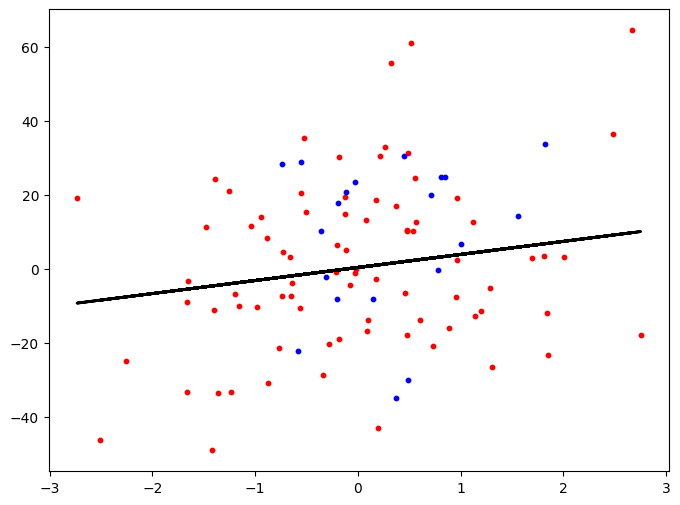

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression(lr = 0.001, epochs = 1000)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
print(np.mean((y_test - pred)**2)) # Mean Square Error

y_pred_line = reg.predict(X)
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color='r', s=10)
m2 = plt.scatter(X_test, y_test, color='b', s=10)
plt.plot(X, y_pred_line, color='k', linewidth=2)
plt.show()